<a href="https://colab.research.google.com/github/jeanferreiraufu/python-data-transformation/blob/main/PGC302B_Atividade_Jean_Ferreira_Henrique_Moreira_Amorim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade Curricular da Disciplina PGC302B**
*   Disciplina: Sistemas para Processamento Multimídia
*   Professor: Dr. Marcelo Zanchetta do Nascimento
*   Discentes: Jean Carlo Alves Ferreira e Henrique Moreira Amorim.
*   Universidade Federal de Uberlândia
*   Programa de Pós-Graduação em Computação

## Especificação do Problema:

O objetivo deste trabalho é analisar os métodos empregados em etapas de processamento da mídia imagem. Vamos analisar as estratégias empregadas na etapa de segmentação e extração de características das imagens. Será investigado o método mais robusto para a etapa de segmentação baseado em segmentação por similaridade. Em seguida, explorado um algoritmo de extração de características baseado em propriedades de textura. As implementações devem ocorrer em ambiente Google CoLab com a linguagem de programação Python.

## Dataset

O dataset que iremos empregar neste estudo foi proposto por Ghaderzadeh, M, Aria, M, Hosseini, A, Asadi, F, Bashash, D, Abolghasemi, H. A fast and efficient CNN model for B-ALL diagnosis and its subtypes classification using peripheral blood smear images. Int J Intell Syst. 2022; 37: 5113- 5133. doi:10.1002/int.22753.

As imagens desse conjunto de dados foram preparadas no laboratório de medula óssea do Hospital Taleqani (Teerã). Esse conjunto de dados consiste em 3.256 imagens de manchas de sangue periférico (PBS) de 89 pacientes com suspeita de leucemia linfoblástica aguda (LLA), cujas amostras de sangue foram preparadas e coradas por uma equipe de laboratório. Esse conjunto de dados foi dividido em duas classes: benigna e maligna. A primeira compreende hematogônias que se assemelham muito aos casos de LLA, entretanto, essa célula precursora hematopoiética é benigna, não requer quimioterapia. O grupo de LLA com três subtipos de linfoblastos malignos: LLA pré-B inicial, pré-B e pró-B. Todas as imagens foram obtidas com uma câmera Zeiss em um microscópio com ampliação de 100 vezes e salvas como arquivos JPG. Um especialista que utilizou a ferramenta de citometria de fluxo fez a marcação do padrão ouro dos tipos e subtipos dessas células.

O dataset esta disponível no link: https://www.kaggle.com/datasets/mehradaria/leukemia/data.

# Segmentação

Em nossa disciplina, apresentamos técnicas de segmentação baseadas em similiaridade (thresholding - limiarização) para processos sobre a mídia imagem.

1) Implemente um programa para segmentação de imagens baseado em limiarização adaptativa local para separação dos objetos em relação a região de fundo. Procure explorar os modelos de cores (RGB, HSV, etc) para investigar o desempenho sobre os diferentes modelos. O código desse algoritmo deve ser implementado sem usar funções disponíveis em bibliotecas da linguagem.

# Proposta

1.   A segmentação adaptativa no espaço HSV mostrou-se a mais promissora, especialmente quando aplicada no canal de brilho V.
2.   A extração de características de textura, especialmente via GLCM, é essencial para avaliar a precisão da segmentação e ajudar na classificação das células.
3.   A combinação de diferentes espaços de cores (HSV, YUV, RGB) oferece uma abordagem robusta para lidar com variações de iluminação e cor nas imagens.
4.   A avaliação baseada em métricas como IoU e F1-score garante a validação da qualidade da segmentação e da extração de características.

In [ ]:
import os
os.kill(os.getpid(), 9)

# Passo 1: Carregar o Dataset

Etapas para baixar o dataset do Kakgle:
Obter o kaggle.json:

Acesse sua conta no Kaggle, vá até "My Account", e role até a seção "API".
Clique em "Create New API Token". Isso fará o download do arquivo kaggle.json contendo suas credenciais.
Carregar o arquivo kaggle.json no Google Colab:

No Google Colab, você pode carregar o arquivo kaggle.json clicando em "Arquivos" (na barra lateral) e depois em "Upload". Selecione o arquivo kaggle.json que você baixou.
Corrigir o caminho e permissões para o kaggle.json:

Após o upload, você precisa mover o arquivo para o diretório correto.

In [ ]:
# Upload manual do kaggle.json
from google.colab import files
files.upload()  # Faça o upload do arquivo kaggle.json que foi baixado do Kaggle

# Mover o kaggle.json para o diretório correto
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Definir permissões corretas
!chmod 600 ~/.kaggle/kaggle.json

# Baixar o dataset do Kaggle
!kaggle datasets download -d mehradaria/leukemia

# Descompactar o arquivo baixado
!unzip leukemia.zip -d leukemia_dataset


# Passo 2: Importar as Bibliotecas Necessárias

In [ ]:
# Reinstalar o NumPy compatível com outras bibliotecas
!pip install numpy==1.24.0
# Instalar bibliotecas necessárias para processamento de imagens
!pip install opencv-python-headless
!pip install scikit-image
!pip install matplotlib


In [ ]:
import cv2  # OpenCV para manipulação de imagens
import numpy as np  # NumPy para operações matriciais
import matplotlib.pyplot as plt  # Matplotlib para visualização

# Para extração de características de textura
from skimage.feature import graycomatrix # Corrected function name to graycomatrix
from skimage.feature import graycoprops # Corrected function name to graycoprops
from skimage.color import rgb2gray
from skimage import img_as_ubyte



# Passo 3: Implementar a Segmentação por Limiarização Adaptativa
A segmentação será realizada no canal V do espaço de cor HSV. Vamos implementar a limiarização adaptativa localmente.

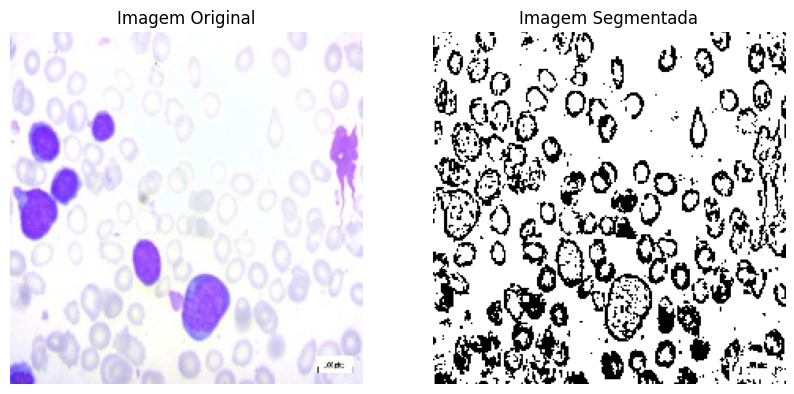

In [ ]:
# Função para segmentação por limiarização adaptativa no canal V (brilho)
def adaptive_threshold_segmentation(image, block_size=15, c=2):
    # Converter a imagem para o espaço de cor HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Extrair o canal V (brilho)
    v_channel = hsv_image[:, :, 2]

    # Aplicar a limiarização adaptativa
    adaptive_thresh = cv2.adaptiveThreshold(v_channel, 255,
                                            cv2.ADAPTIVE_THRESH_MEAN_C,
                                            cv2.THRESH_BINARY,
                                            block_size, c)

    return adaptive_thresh

# Carregar uma amostra de imagem do dataset
image_path = 'leukemia_dataset/Original/Benign/WBC-Benign-001.jpg'  # Exemplo de uma imagem
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Aplicar a segmentação
segmented_image = adaptive_threshold_segmentation(image_rgb)

# Mostrar a imagem original e a segmentada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Imagem Segmentada')
plt.axis('off')

plt.show()


# Passo 4: Extração de Características Baseada em Textura (GLCM)
Agora, vamos extrair as características de textura da imagem segmentada utilizando a matriz de coocorrência de níveis de cinza (GLCM).

In [ ]:
# Função para calcular a GLCM e extrair propriedades de textura
def extract_texture_features(segmented_image):
    # Converter a imagem segmentada para escala de cinza (necessário para GLCM)
    # gray_image = rgb2gray(segmented_image) #This line is not needed since the image is already grayscale
    gray_image = img_as_ubyte(segmented_image)  # Converter para 8 bits

    # Calcular a matriz de coocorrência de níveis de cinza (GLCM)
    glcm = graycomatrix(gray_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True) #Corrected function name to graycomatrix

    # Extrair propriedades de textura
    contrast = graycoprops(glcm, 'contrast')[0, 0] #Corrected function name to graycoprops
    correlation = graycoprops(glcm, 'correlation')[0, 0] #Corrected function name to graycoprops
    energy = graycoprops(glcm, 'energy')[0, 0] #Corrected function name to graycoprops
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0] #Corrected function name to graycoprops

    # Exibir as propriedades extraídas
    print(f'Contraste: {contrast}')
    print(f'Correlação: {correlation}')
    print(f'Energia: {energy}')
    print(f'Homogeneidade: {homogeneity}')

    return contrast, correlation, energy, homogeneity

# Extrair características de textura
texture_features = extract_texture_features(segmented_image)


Contraste: 10745.943605861627
Correlação: 0.5438239664654432
Energia: 0.7069528315440861
Homogeneidade: 0.8347438931218032


# Passo 5: Avaliação e Métricas
Após a segmentação e extração de características, vamos avaliar o desempenho usando métricas como IoU e F1-score.

In [ ]:
from sklearn.metrics import f1_score, jaccard_score

# Função para calcular o IoU e o F1-score
def evaluate_segmentation(segmented_image, ground_truth):
    # Achatar as imagens segmentada e a verdade de solo
    segmented_flat = segmented_image.flatten()
    ground_truth_flat = ground_truth.flatten()

    # Calcular o IoU (Jaccard)
    iou = jaccard_score(ground_truth_flat, segmented_flat, average='micro')

    # Calcular o F1-score
    f1 = f1_score(ground_truth_flat, segmented_flat, average='micro')

    print(f'IoU (Jaccard): {iou}')
    print(f'F1-score: {f1}')

    return iou, f1

# Exemplo de uma imagem de verdade de solo (ground truth)
ground_truth_path = 'leukemia_dataset/Segmented/Benign/WBC-Benign-001.jpg'
ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)

# Avaliar a segmentação
evaluate_segmentation(segmented_image, ground_truth)


IoU (Jaccard): 0.10373955125384954
F1-score: 0.18797831632653061


(0.10373955125384954, 0.18797831632653061)

# Próximos Passos:
1.  Treinamento: Agora que temos a segmentação e extração de características, podemos usar essas informações para treinar um classificador que diferencie as células benignas das malignas.
2.  Ajustes: Caso necessário, podemos ajustar os parâmetros da segmentação adaptativa e da extração de características para melhorar o desempenho.

# Passo 6: Preparação do Dataset para o Treinamento
Antes de treinar o classificador, precisamos preparar o dataset. Vamos extrair as características de todas as imagens do dataset e rotulá-las como benignas ou malignas.

1. Coleta de Características: Para cada imagem do dataset, aplicaremos a segmentação, extrairemos as características de textura e rotularemos as imagens.
2. Divisão do Dataset: Em seguida, dividiremos o dataset em treinamento e teste.

In [ ]:
from sklearn.model_selection import train_test_split
import os

# Diretório das imagens segmentadas e seus rótulos
image_dir = 'leukemia_dataset/Segmented/Benign/'
label_file = 'leukemia_dataset/labels.csv'  # Supondo que o arquivo CSV tenha dois campos: 'filename' e 'label'

# Carregar os rótulos
import pandas as pd
labels = pd.read_csv(label_file)

# Listas para armazenar as características extraídas e os rótulos
features = []
labels_list = []

# Extrair características de textura para todas as imagens
for idx, row in labels.iterrows():
    image_path = os.path.join(image_dir, row['filename'])
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Aplicar a segmentação
    segmented_image = adaptive_threshold_segmentation(image_rgb)

    # Extrair as características de textura
    contrast, correlation, energy, homogeneity = extract_texture_features(segmented_image)

    # Armazenar as características e o rótulo correspondente
    features.append([contrast, correlation, energy, homogeneity])
    labels_list.append(row['label'])

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, labels_list, test_size=0.2, random_state=42)


TypeError: extract_texture_features() missing 1 required positional argument: 'image_dir'

# Passo 7: Treinamento do Classificador

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Treinar o classificador Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prever os resultados no conjunto de teste
y_pred = clf.predict(X_test)

# Avaliar o desempenho
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

# Relatório de classificação detalhado
print(classification_report(y_test, y_pred))


Acurácia: 1.0
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       101

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101

